In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from string import punctuation
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#Loading of Data

In [2]:

df=pd.read_csv("/content/drive/MyDrive/Sentiment Analysis(imdb data)/IMDB-Dataset.csv")
df.head(5)

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...


In [3]:
df.shape

(150000, 4)

In [4]:
!python -m spacy download en_core_web_lg

2023-11-25 10:11:55.927229: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 10:11:55.927316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 10:11:55.927363: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 10:11:55.940594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 10:11:57.773574: W tensorflow/compiler/

#Data Cleaning and Preprocessing

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp=spacy.load("en_core_web_lg")

In [6]:
len(STOP_WORDS)

326

In [7]:
type(STOP_WORDS)

set

In [8]:
stop_list = list(STOP_WORDS)

In [9]:
new_stopwords = ["would","shall","could","might"]
stop_list.extend(new_stopwords)

In [10]:
stop_list.remove("not")
stop_list.remove('n’t')
stop_words=set(stop_list)
len(stop_words)

325

In [12]:
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [13]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)
# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)
#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)
# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content

In [17]:
df.drop(['Resenhas'], inplace=True, axis=1)
df.head()

,Ratings,Reviews,Movies
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie


In [18]:
%%time
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

CPU times: user 39.7 s, sys: 19 ms, total: 39.7 s
Wall time: 41.3 s


,Ratings,Reviews,Movies,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,disclaimer watched movie conditional agreement films free not caught dead giving hard earned money idiots explain depth film write shortest review not movie far stupidest lamest lazy unbelievably unfunny movie seen total disaster hatred movie like extends far viewing think bit not know people movie carmen electra vanessa minnillo kim kardashian not matter horrible think point editing flat horrible possibly blatant continuity errors crapfast crappier thought know films not supposed come film making gets minor facial cut shot gets cut sword blood cut narnia films away disaster movie pass jokes thoughtless mindless physical gags obviously popular movies year late including best picture nominees know saddest thing stupid movies not care money cameos sorry ass excuses films taking away jobs actors writers directors truly deserve attention lionsgate thought better taste ashamed making kind crap jason friedberg aaron seltzer burn hell guys contributing decline western civilization correct...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,writing hopes gets previous review film find slop entertaining completely spoof film entitled disaster movie spoof disaster films seen yes count disaster film spoofed twister juno iron man batman hulk alvin chipmunks amy winehouse hancock register disaster films selzterwater failburg shown lack sort writing skill humor having unfortunately tortured date movie epic movie know exactly expect plot jokes bad references cheaply remade scenes films informed satire copy paste film not actually taken trailers clever witty remotely smart way write not believe people pay travesties insult audience enjoy films doubt smart realize rating unfortunately not number low yes includes negatives rate deserves worst films time right date movie epic faliure mean movie meet spartans forced hour manos hands fate marathon watch slop
2,1.0,"Really, I could write a scathing review of this turd sandwich, but instead, I'm ju

#Data Overview

In [19]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Reviews_clean     0
dtype: int64

In [20]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [21]:
df.shape

(150000, 4)

In [22]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149752
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [23]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149752
Unique movie names:14206
No of ratings:150000


#Exploratory Data Analysis

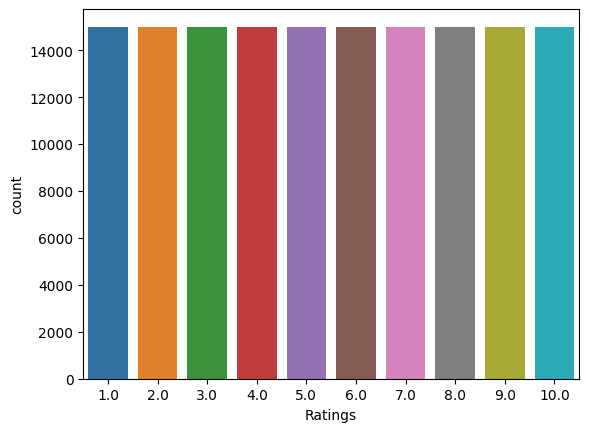

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [24]:
#Checking for Class Imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

CPU times: user 1min 3s, sys: 4.53 s, total: 1min 7s
Wall time: 1min 14s


(-0.5, 1499.5, 799.5, -0.5)

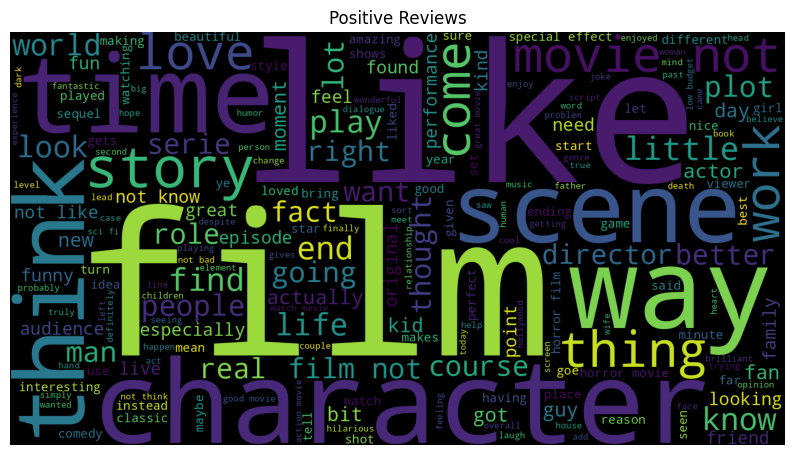

In [27]:
%%time
'''----------------------------Visualization of Important Words from Positive Reviews-----'''
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

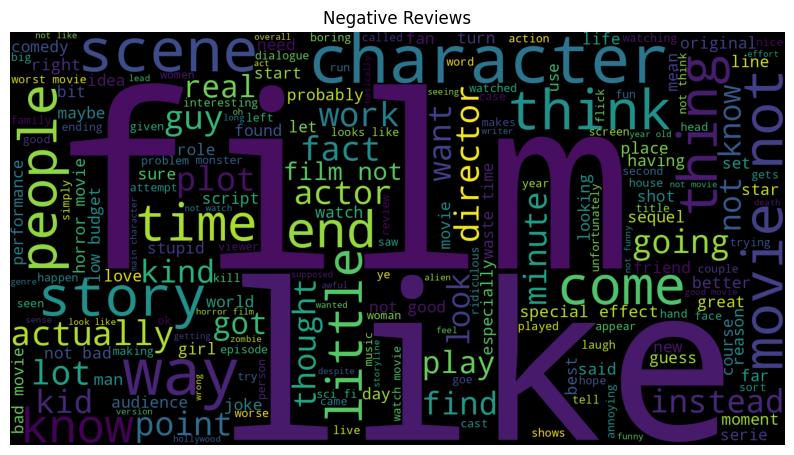

CPU times: user 1min, sys: 2.2 s, total: 1min 2s
Wall time: 1min 25s


In [29]:
%%time
'''----------------------------Visualization of Important Words from Negative Reviews--------------------'''

neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

#Basic Statistic of Review data

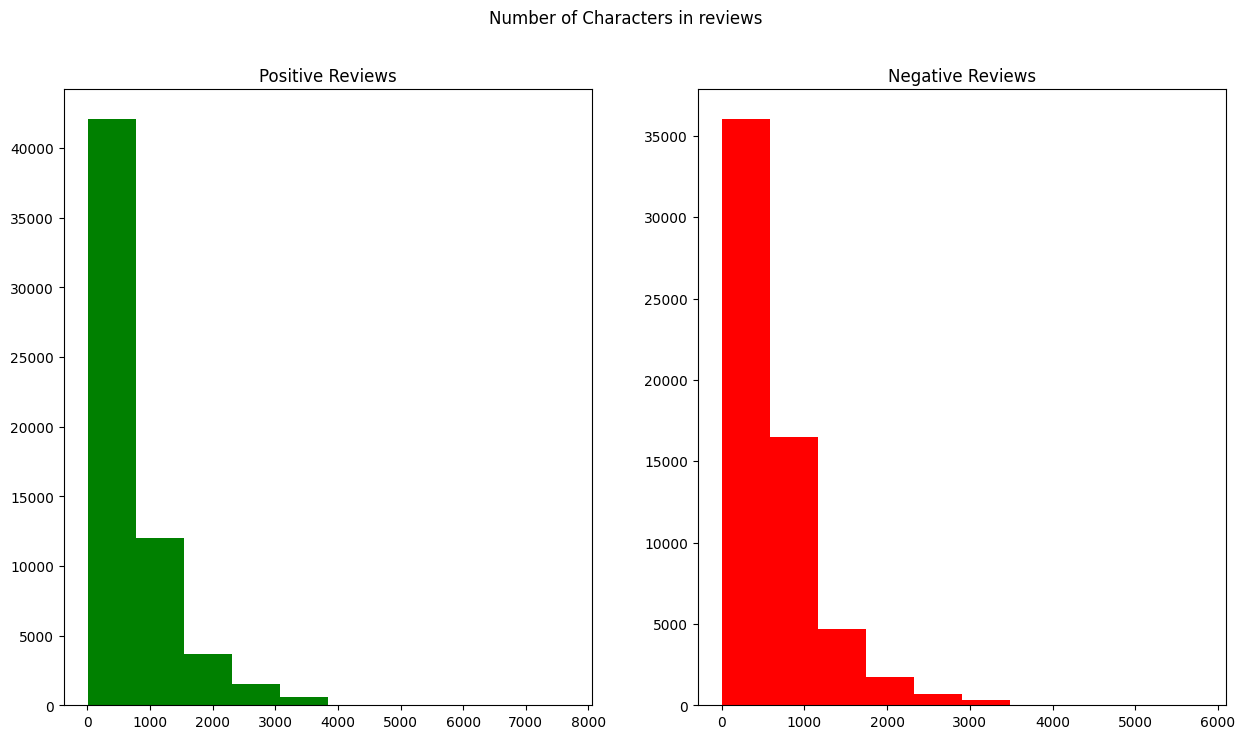

In [30]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

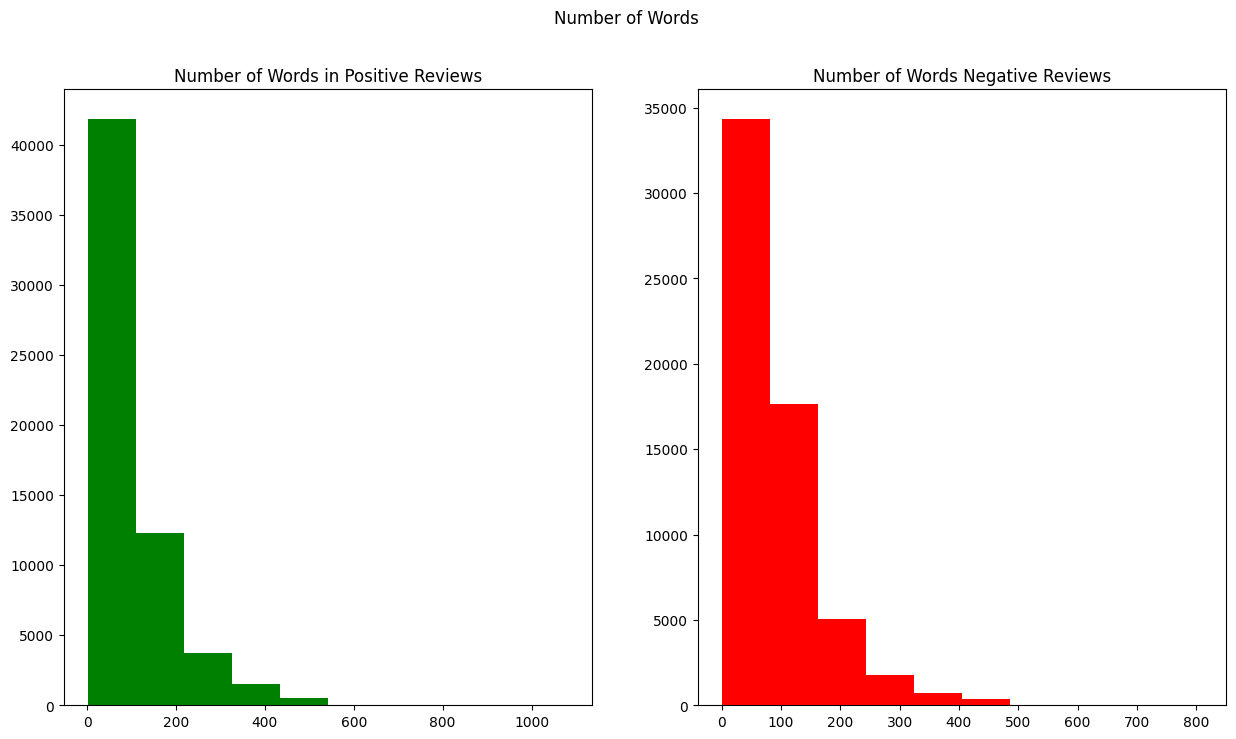

In [ ]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

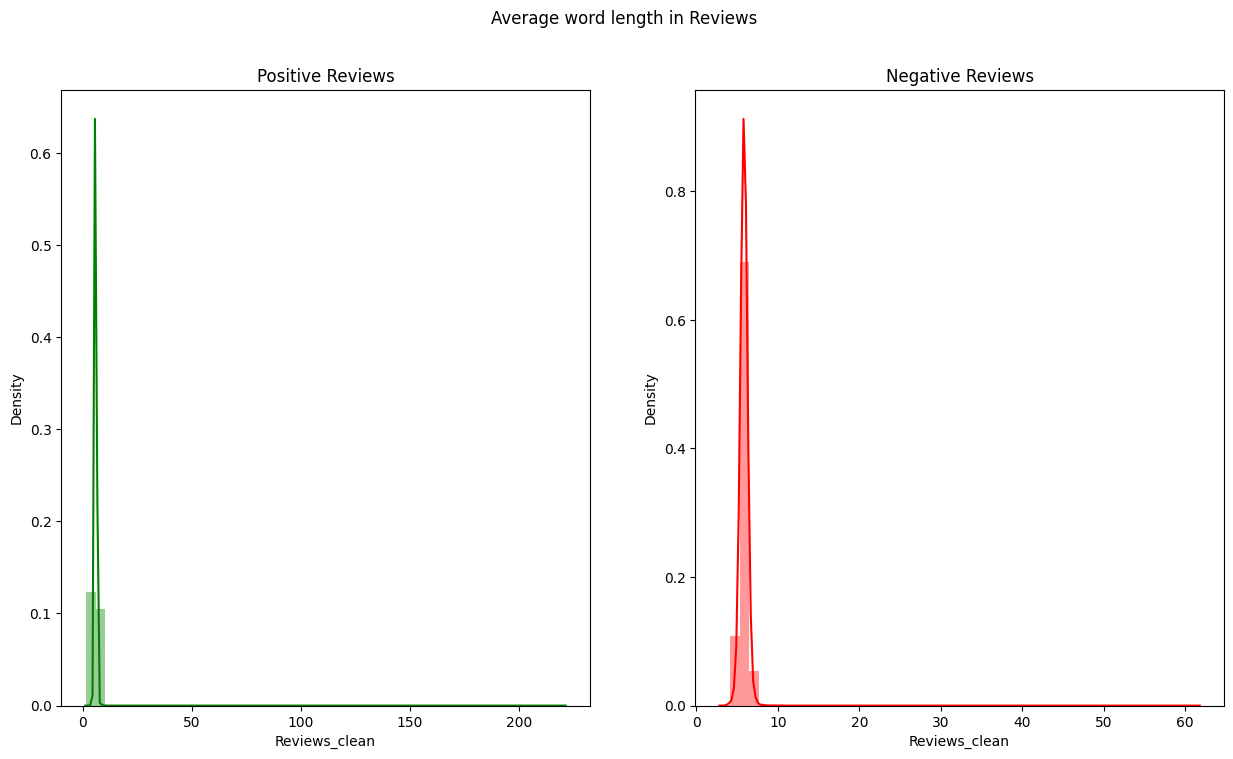

In [32]:
#Visulaize average of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [33]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [35]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [36]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [37]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head()

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it – Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7.0,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7.0,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7.0,Alone in the Dark II
90251,"You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 5 is sasquatch hunters, it was beyond helpless.",7.0,Boa vs. Python
90287,"OK, let's look past the fact that the director, Christina Peters (aka Kat Slater), went on to direct a profusion of pulsating porn including, but not limited to, ""Young Sluts, Inc."" 1 thru 15 and ""Cum Swappers"" 1 thru 4.Let's look past the fact that basically every review is slamming this

In [38]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon unigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [39]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [40]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],50,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [42]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("not know"))].head()

,Reviews,Ratings,Movies
26,I don't like this film. Because this isn't a biography. Some real things are missing on this film. Fethullah Gulen ( other names Feto) is not mentioned at all. It is not a film that reflects the truth... Things have not been fully addressed. I do not know what I wrote. I am translating from google to fill 5 rows.,1.0,Reis
89,"There are not words that can describe how bad that movie was. Luckily we watched the MST 3000 version. I honestly do not know if I could survived it otherwise. That was without question the movie I have ever seen. The plot was horrendously constructed. Without the possible exception of the family, the writer poorly conceived his characters. I think many people gave it a 10 for its vintage quality. For some including myself, bad movies (particularly during the sixties and seventies)have more aesthetic quality than many good movies. Make no bones about it, however, anything more than a 1 is too much and is quite deceiving. Having said that, Please watch it.",1.0,Manos: The Hands of Fate
302,"Dear, oh dear, oh, dear, why did I ever watch this debacle? I love movies and have seen a huge amount of them ranging from outstanding to awful. While I have seen some stinkers from this last decade, this drivel known as After Last Season really takes the cake.I seriously do not know when to start criticising After Last Season. When I first heard of it and saw its poster here, I thought it was going to be romantic comedy or a fantasy. But no, the makers intended it to be a sort of sci-fi thriller with (I think they said) Hitchcockian elements. To me, After Last Season was just a badly shot, appallingly acted, uneventful and dull film that does absolutely nothing to either live up to its premise or engage the viewer.On a visual and technical level, After Last Season looks poor. The setting is most of the time an empty room, but that wasn't what made the film so bad to look at. The lighting is very dull a vast majority of the time, while the editing is all-over-the-place and random. ...",1.0,After Last Season
314,"Just... HORRIBLE! Why was this made? Where did the 5,000,000 dollar budget go? Why did the creator make thousands of fake IMDb accounts and give it 10 stars? He should be punished. Punished for falsely voting, and punished for making such a shitty movie. I do not know how to describe this movie. I went to a random word generator for that. (No joke) This film was horrible. The sound design, the sets, the music, the camera-work. It's all just horrible! How was this shot on 35 millimeter film? It looks horrible. It is a disgrace to films! Why was it made is the last question I have, and it is also my last argument. This film was literally burned by cinemas, because it was cheaper than sending it back to the creators. The only known evidence is the DVDs of this monstrosity. Destroy the DVDs if you have them. Please. For me and for the world.",1.0,After Last Season
340,"I just wasted 2 hours of my life for this crap. After seeing Joker and Tees Mar Khan i was expecting that those were the worst things ever happened to me but boy , Sajid Khan proved me wrong. This crap is senseless and a torture to anyone . U must be a real himmatwala to watch himmatwala (bullshit). Sajid Khan please use some logic before releasing a torture cell. Do not waste your time and money . Acting by each and everyone in the movie is pathetic. Ajay Devgan disappointed me a lot . Im a huge fan of him but he is a total waste in this movie. Direction from Sajid Khan is too bad. I think he was confused while making this movie and did not know what to do . Tamanna Bhatia is beautiful but her acting was not up to the mark. Paresh Rawal is way out of his own league in this flick. In a nut shell this movie is going to be the biggest flop of this year.",1.0,Himmatwala


In [45]:
df.to_csv('/content/drive/MyDrive/Sentiment Analysis(imdb data)/Dataset/preprocessData.csv', index=False)